### Workgroup 3

* Rick Chuquilin
* Kenia Moscoso 
* Luciana Alvarez 

## 1. Multicolinearity 

The multicollinearity  is the dependency of two o more explicatives variables in a model regression; specific, put away the Gauss-Markov condition. It's important to say that the dependency of the variables has to be strong to be consider a multicollinearity case. 

It can be consider two cases of multi:exact multicollinearity and approximately multicollinearity.

The first type of multicollinearity consists in a variable or variables depends linealy of other.


$$ 
Y_i = \beta_0 + X_1\beta_1 + X_2\beta_2 + X_3\beta_3 + \epsilon   ... (1) ;  
$$


$$
X_1 = 2.X_2 - 3.X_3
$$

For example, in the ecuacion 1 represents a exact multicollinearity case because a variable depends linealy of others. The real problem of this kind of multicollinearity it's that it wouldn't be possible estimate the coefficients of the regresors. Remember: 

$$
\hat{\beta} = (X'X)^{-1}(X'Y) ... (2)
$$

So, if exist multi. exact, the matrix $(X'X)$ will have determinant equal to zero, so it won't be invertible.  

The other case of multi: approximately multi consists in a variable of variables depends of other but no its exclusive a lineal combination. For example:

$$
Y_i = \beta_0 + X_1\beta_1 + X_2\beta_2 + X_3\beta_3 + \epsilon   ... (3) ;  
$$

$$
X_3 = 2X_1 + v_i, v_i \sim N(0, \sigma^2)
$$

The ecuation shows that $X_3$ its aproximaly a lineal combination of other variable; the problem with this case, its that matrix $(X'X)$ equation 2 will be approximately zero and the coeficient would be affected. 

* A way to solution the multicollinearity problem it's delete the variable that causes it. 

In [3]:
import numpy as np
import random

In [14]:
vector_1 = np.random.normal(0,1, 90).reshape(10,9).round(2) #wich the first one of normal are the mean and the standard desviation of a normal distribution
vector_1

array([[-0.08,  1.43, -0.38,  1.43,  0.02,  1.42, -1.05, -0.75,  0.53],
       [-0.19,  2.33, -2.04,  1.47, -0.09, -2.16,  0.06,  1.06, -0.41],
       [ 0.15,  0.23, -1.01, -1.02,  1.37, -0.35, -0.31,  0.84, -0.09],
       [ 0.58,  1.37,  0.62,  0.02, -1.38, -1.27,  0.26,  1.01, -0.12],
       [ 0.02,  0.64, -0.92, -1.58,  1.4 , -0.77, -0.15,  0.47, -0.23],
       [-2.29, -0.91, -1.12,  0.97,  0.95,  0.71, -0.51, -0.91,  0.53],
       [ 0.58, -0.67,  0.42, -0.06,  1.42,  0.83, -1.74, -0.41, -0.08],
       [-0.27,  1.77, -0.12,  0.74, -0.54, -0.33,  0.64,  2.38, -0.18],
       [-1.18,  0.21, -0.43, -0.5 ,  1.13, -0.1 , -1.26, -0.57,  0.69],
       [ 0.41,  0.55,  1.75,  0.76,  0.2 ,  1.69, -0.63, -0.02,  1.04]])

In [15]:
#creating the vector wich is a linear function of vector_1

vector_2 = (vector_1[:,5] + vector_1[:,3] + 2*vector_1[:,8] + 3*vector_1[:,1]).reshape((10,1))
vector_2

array([[ 8.2 ],
       [ 5.48],
       [-0.86],
       [ 2.62],
       [-0.89],
       [ 0.01],
       [-1.4 ],
       [ 5.36],
       [ 1.41],
       [ 6.18]])

In [16]:
import pandas as pd

In [22]:
#append the vector 1 and vector 2 to have a vector (10x10)

Matrix = np.append(vector_1, vector_2, axis=1)
df_Matrix = pd.DataFrame(data = Matrix, index = pd.RangeIndex(range(1,11)), columns = pd.RangeIndex(range(1,11)))
df_Matrix

1     2     3     4     5     6     7     8     9     10
1  -0.08  1.43 -0.38  1.43  0.02  1.42 -1.05 -0.75  0.53  8.20
2  -0.19  2.33 -2.04  1.47 -0.09 -2.16  0.06  1.06 -0.41  5.48
3   0.15  0.23 -1.01 -1.02  1.37 -0.35 -0.31  0.84 -0.09 -0.86
4   0.58  1.37  0.62  0.02 -1.38 -1.27  0.26  1.01 -0.12  2.62
5   0.02  0.64 -0.92 -1.58  1.40 -0.77 -0.15  0.47 -0.23 -0.89
6  -2.29 -0.91 -1.12  0.97  0.95  0.71 -0.51 -0.91  0.53  0.01
7   0.58 -0.67  0.42 -0.06  1.42  0.83 -1.74 -0.41 -0.08 -1.40
8  -0.27  1.77 -0.12  0.74 -0.54 -0.33  0.64  2.38 -0.18  5.36
9  -1.18  0.21 -0.43 -0.50  1.13 -0.10 -1.26 -0.57  0.69  1.41
10  0.41  0.55  1.75  0.76  0.20  1.69 -0.63 -0.02  1.04  6.18

In [23]:
#inverse of vector 
Matrix_inversa = np.linalg.inv(vector).round(5)
Matrix_inversa_df = pd.DataFrame(data = Matrix_inversa, index = pd.RangeIndex(range(1, 11)), columns=pd.RangeIndex(range(1, 11)))
Matrix_inversa_df

1             2             3             4             5   \
1   3.960100e-01 -8.506000e-02  9.170400e-01  1.085860e+00  2.479400e-01   
2   1.106353e+15 -1.293414e+15  2.733730e+15  8.793955e+15  4.253526e+15   
3  -5.003300e-01  1.461100e-01 -8.541400e-01 -4.210300e-01  1.096300e-01   
4   3.687843e+14 -4.311381e+14  9.112432e+14  2.931318e+15  1.417842e+15   
5  -2.486000e-01  1.917800e-01 -2.674600e-01  3.224000e-01  1.115900e+00   
6   3.687843e+14 -4.311381e+14  9.112432e+14  2.931318e+15  1.417842e+15   
7  -1.242900e-01  6.376000e-02 -7.398000e-02  4.717300e-01  9.971200e-01   
8  -6.238000e-02 -1.474600e-01  7.161000e-01  3.049500e-01 -6.033600e-01   
9   7.375686e+14 -8.622761e+14  1.822486e+15  5.862637e+15  2.835684e+15   
10 -3.687843e+14  4.311381e+14 -9.112432e+14 -2.931318e+15 -1.417842e+15   

              6             7             8             9             10  
1  -4.730000e-02  1.858000e-02 -8.143200e-01 -1.798540e+00  3.225800e-01  
2   7.344818e+15  1.084252e+15 -3.384098e+15 -7.442264e+15  1.810544e+15  
3   7.368900e-01  2.681200e-01  1.309000e-01  1.202610e+00  1.837300e-01  
4   2.448273e+15  3.614173e+14 -1.128033e+15 -2.480755e+15  6.035148e+14  
5   7.972000e-01  3.195200e-01 -3.884600e-01 -9.627600e-01  6.606800e-01  
6   2.448273e+15  3.614173e+14 -1.128033e+15 -2.480755e+15  6.035148e+14  
7   7.358700e-01 -2.711400e-01 -4.059800e-01 -1.059380e+00  6.014400e-01  
8   1.701300e-01  4.904000e-02  2.354600e-01 -1.341300e-01 -9.810000e-03  
9   4.896545e+15  7.228345e+14 -2.256066e+15 -4.961510e+15  1.207030e+15  
10 -2.448273e+15 -3.614173e+14  1.128033e+15  2.480755e+15 -6.035148e+14

The vector outputs are diferent because the vector is singular, it means that the determinant is equal to zero. So for a mathematical property, the matrix can't have an inverse. 

## 2. Analyzing RCT data with Precision Adjustment

In [24]:
!pip install pyreadr

In [160]:
import pandas as pd
import pyreadr

In [161]:
Penn = pd.read_csv("../data/penn_jae.dat" , sep='\s', engine='python')
Penn

abdt  tg  inuidur1  inuidur2  female  black  hispanic  othrace  dep  \
0      10824   0        18        18       0      0         0        0    2   
1      10635   2         7         3       0      0         0        0    0   
2      10551   5        18         6       1      0         0        0    0   
3      10824   0         1         1       0      0         0        0    0   
4      10747   0        27        27       0      0         0        0    0   
...      ...  ..       ...       ...     ...    ...       ...      ...  ...   
13908  10831   5        27        27       0      0         0        0    0   
13909  10677   2         4         4       1      0         0        0    0   
13910  10817   4         4         4       0      0         0        0    0   
13911  10691   0        27        27       0      0         0        0    0   
13912  10677   5        25        25       0      0         0        0    0   

       q1  ...  q5  q6  recall  agelt35  agegt54  durable  nondurable  lusd  \
0       0  ...   0   0       0        0        0        0           0     1   
1       0  ...   0   0       1        0        0        0           1     0   
2       0  ...   0   1       0        1        0        0           0     0   
3       0  ...   0   0       0        0        0        0           1     0   
4       0  ...   0   0       0        0        0        0           1     0   
...    ..  ...  ..  ..     ...      ...      ...      ...         ...   ...   
13908   0  ...   0   1       0        1        1        0           0     1   
13909   0  ...   0   0       0        1        0        0           1     0   
13910   0  ...   0   0       0        1        0        0           0     0   
13911   0  ...   0   0       0        1        1        0           1     0   
13912   0  ...   0   0       0        1        0        1           0     1   

       husd  muld  
0         0   NaN  
1         0   NaN  
2         0   NaN  
3         0   NaN  
4         0   NaN  
...     ...   ...  
13908     0   NaN  
13909     0   NaN  
13910     0   NaN  
13911     0   NaN  
13912     0   NaN  

[13913 rows x 24 columns]

In [162]:
n = Penn.shape[0]
p_1 = Penn.shape[1]
Penn = Penn[ (Penn['tg'] == 2) | (Penn['tg'] == 0) ]
Penn

abdt  tg  inuidur1  inuidur2  female  black  hispanic  othrace  dep  \
0      10824   0        18        18       0      0         0        0    2   
1      10635   2         7         3       0      0         0        0    0   
3      10824   0         1         1       0      0         0        0    0   
4      10747   0        27        27       0      0         0        0    0   
9      10754   2        20        20       1      0         0        0    0   
...      ...  ..       ...       ...     ...    ...       ...      ...  ...   
13900  10845   0         6         6       1      0         0        1    2   
13901  10705   2        14        14       0      1         0        0    0   
13906  10558   0         9         9       0      0         0        0    2   
13909  10677   2         4         4       1      0         0        0    0   
13911  10691   0        27        27       0      0         0        0    0   

       q1  ...  q5  q6  recall  agelt35  agegt54  durable  nondurable  lusd  \
0       0  ...   0   0       0        0        0        0           0     1   
1       0  ...   0   0       1        0        0        0           1     0   
3       0  ...   0   0       0        0        0        0           1     0   
4       0  ...   0   0       0        0        0        0           1     0   
9       0  ...   0   0       0        0        0        0           0     0   
...    ..  ...  ..  ..     ...      ...      ...      ...         ...   ...   
13900   0  ...   0   0       0        0        0        1           0     0   
13901   0  ...   0   0       0        0        1        0           0     0   
13906   0  ...   0   0       1        0        0        0           1     0   
13909   0  ...   0   0       0        1        0        0           1     0   
13911   0  ...   0   0       0        1        1        0           1     0   

       husd  muld  
0         0   NaN  
1         0   NaN  
3         0   NaN  
4         0   NaN  
9         1   NaN  
...     ...   ...  
13900     1   NaN  
13901     1   NaN  
13906     0   NaN  
13909     0   NaN  
13911     0   NaN  

[5782 rows x 24 columns]

In [164]:
#this columns were not dropped out :  Unnamed: 13, recall
Penn.columns
Penn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 13911
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   abdt         5782 non-null   int64  
 1   tg           5782 non-null   int64  
 2   inuidur1     5782 non-null   int64  
 3   inuidur2     5782 non-null   int64  
 4   female       5782 non-null   int64  
 5   black        5782 non-null   int64  
 6   hispanic     5782 non-null   int64  
 7   othrace      5782 non-null   int64  
 8   dep          5782 non-null   int64  
 9   q1           5782 non-null   int64  
 10  q2           5782 non-null   int64  
 11  q3           5782 non-null   int64  
 12  q4           5782 non-null   int64  
 13  Unnamed: 13  5782 non-null   int64  
 14  q5           5782 non-null   int64  
 15  q6           5782 non-null   int64  
 16  recall       5782 non-null   int64  
 17  agelt35      5782 non-null   int64  
 18  agegt54      5782 non-null   int64  
 19  durab

In [189]:
# Dependent variable
Penn['T2'] = (Penn[['tg']]==2).astype(int)

# Create category variable
Penn['dep'] = Penn['dep'].astype( 'category' )
Penn.head()

C:\Users\Kenia\AppData\Local\Temp/ipykernel_3376/1749163411.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Penn['T2'] = (Penn[['tg']]==2).astype(int)
C:\Users\Kenia\AppData\Local\Temp/ipykernel_3376/1749163411.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Penn['dep'] = Penn['dep'].astype( 'category' )


abdt  tg  inuidur1  inuidur2  female  black  hispanic  othrace dep  q1  \
0  10824   0        18        18       0      0         0        0   2   0   
1  10635   2         7         3       0      0         0        0   0   0   
3  10824   0         1         1       0      0         0        0   0   0   
4  10747   0        27        27       0      0         0        0   0   0   
9  10754   2        20        20       1      0         0        0   0   0   

   ...  q6  recall  agelt35  agegt54  durable  nondurable  lusd  husd  muld  \
0  ...   0       0        0        0        0           0     1     0   NaN   
1  ...   0       1        0        0        0           1     0     0   NaN   
3  ...   0       0        0        0        0           1     0     0   NaN   
4  ...   0       0        0        0        0           1     0     0   NaN   
9  ...   0       0        0        0        0           0     0     1   NaN   

   T2  
0   0  
1   1  
3   0  
4   0  
9   1  

[5 rows x 25 columns]

In [166]:
Penn['dep'].unique()


[2, 0, 1]
Categories (3, int64): [0, 1, 2]

#### Plot two histograms for treatment and control group to see the distribution of the outcome variable inuidur1


In [167]:
import plotly.express as px

In [168]:
Q = pd.DataFrame( Penn, columns = [ 'q1','q2','q3','q4','q5','q6'])
inuidur1 = pd.DataFrame( Penn, columns = ['inuidur1'])
W = pd.concat([Q,inuidur1],axis = 1)
W

q1  q2  q3  q4  q5  q6  inuidur1
0       0   0   0   0   0   0        18
1       0   0   1   0   0   0         7
3       0   0   0   0   0   0         1
4       0   0   0   1   0   0        27
9       0   0   0   1   0   0        20
...    ..  ..  ..  ..  ..  ..       ...
13900   0   0   0   0   0   0         6
13901   0   0   0   1   0   0        14
13906   0   1   0   0   0   0         9
13909   0   0   0   1   0   0         4
13911   0   0   0   1   0   0        27

[5782 rows x 7 columns]

In [169]:
pip install altair

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: six>=1.11.0 in c:\users\kenia\anaconda3\lib\site-packages (from jsonschema>=3.0->altair) (1.16.0)



In [170]:
import altair as alt

In [171]:
alt.data_transformers.enable('default', max_rows=None)

DataTransformerRegistry.enable('default')

In [172]:
alt.Chart(Penn).mark_bar().encode(
    x = alt.X('inuidur1:Q', title = "Length (in weeks) of the first spell of unemployment", bin=False),
    y = 'count():Q',
    color = 'T2',
    tooltip = ['T2',"count()"],
).interactive().properties(
    title = {
      "text": ["HISTOGRAM"], 
      "color": "Black",
    })

alt.Chart(...)

In [173]:
alt.Chart(Penn[Penn['T2'] == 1]).mark_bar().encode(
    alt.X('inuidur1:Q', title = "Length (in weeks) of the first spell of unemployment", bin=False),
    y = 'count():Q',
    tooltip = ["count()"],
).interactive().properties(
    title = {
      "text": ["HISTOGRAM"], 
      "color": "Black"
    })

alt.Chart(...)

In [174]:
alt.Chart(Penn[Penn['T2'] == 0]).mark_bar().encode(
    alt.X('inuidur1:Q', title = "Length (in weeks) of the first spell of unemployment", bin=False),
    y = 'count():Q',
    tooltip = ["count()"],
).interactive().properties(
    title = {
      "text": ["HISTOGRAM"], 
      "color": "Black"
    })

alt.Chart(...)

### A. classical 2-sample approach, no adjustment (CL)


In [144]:
pip install statsmodels

In [175]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import math

In [176]:
cl = 'np.log(inuidur1) ~ T2'
lm_cl = smf.ols(formula = cl,data = Penn).fit().get_robustcov_results(cov_type = "HC1")
print(lm_cl.summary())

                            OLS Regression Results                            
Dep. Variable:       np.log(inuidur1)   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     5.879
Date:                Tue, 26 Apr 2022   Prob (F-statistic):             0.0154
Time:                        23:34:22   Log-Likelihood:                -9344.7
No. Observations:                5782   AIC:                         1.869e+04
Df Residuals:                    5780   BIC:                         1.871e+04
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0568      0.021     98.158      0.0

### B. classical linear regression adjustment (CRA)

In [177]:
CRA = 'np.log(inuidur1) ~ T2 + (female+black+othrace+dep+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)**2'
ols_CRA = smf.ols( formula = CRA, data = Penn ).fit().get_robustcov_results(cov_type = "HC1")
print(ols_CRA.summary())

                            OLS Regression Results                            
Dep. Variable:       np.log(inuidur1)   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     89.08
Date:                Tue, 26 Apr 2022   Prob (F-statistic):               0.00
Time:                        23:34:23   Log-Likelihood:                -9162.5
No. Observations:                5782   AIC:                         1.855e+04
Df Residuals:                    5671   BIC:                         1.929e+04
Df Model:                         110                                         
Covariance Type:                  HC1                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.7006      0.081  

C:\Users\Kenia\Anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 120, but rank is 109
  warnings.warn('covariance of constraints does not have full '


### C. interactive regression adjustment (IRA)

In [191]:
result = pyreadr.read_r('../data/ols_ira_reg.RData')
X_vars = result['S1']

ols_ira = sm.OLS( log_inuidur1, X_vars ).fit().get_robustcov_results(cov_type = "HC1")

print(ols_ira.summary())

                            OLS Regression Results                            
Dep. Variable:               inuidur1   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     35.02
Date:                Tue, 26 Apr 2022   Prob (F-statistic):               0.00
Time:                        23:38:38   Log-Likelihood:                -9129.1
No. Observations:                5782   AIC:                         1.866e+04
Df Residuals:                    5579   BIC:                         2.002e+04
Df Model:                         202                                         
Covariance Type:                  HC1                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
(Intercept)     

C:\Users\Kenia\Anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 202, but rank is 188
  warnings.warn('covariance of constraints does not have full '


### C.1 PLOTS

#### T2*female

In [219]:
est_ira = ols_ira.summary2().tables[1]['Coef.']['T2TRUE:Xfemale'] 
est_ira

-0.6597504681110665

In [208]:
Conf_ira = pd.DataFrame(ols_ira.conf_int())
Conf_ira

0         1
0    2.015091  2.096305
1   -0.132787 -0.007022
2   -1.466167  0.133602
3   -1.445611 -0.281361
4   -5.653826 -1.981550
..        ...       ...
198 -0.449608  0.796047
199 -0.647491  0.398426
200 -0.290518  0.870247
201 -0.286778  0.543000
202 -0.487077  0.513699

[203 rows x 2 columns]

In [213]:
Conf_ira[0]

0      2.015091
1     -0.132787
2     -1.466167
3     -1.445611
4     -5.653826
         ...   
198   -0.449608
199   -0.647491
200   -0.290518
201   -0.286778
202   -0.487077
Name: 0, Length: 203, dtype: float64

In [217]:
ira_p = pd.DataFrame(ols_ira.params)
ira_p

0
0    2.055698
1   -0.069904
2   -0.666282
3   -0.863486
4   -3.817688
..        ...
198  0.173219
199 -0.124532
200  0.289864
201  0.128111
202  0.013311

[203 rows x 1 columns]

In [233]:
err_ira = ira_p - Conf_ira[0]
err_ira= err_ira.iloc[:,0:1]
err_ira

0
0    0.040607
1   -2.084995
2   -2.681373
3   -2.878577
4   -5.832779
..        ...
198 -1.841871
199 -2.139623
200 -1.725226
201 -1.886980
202 -2.001780

[203 rows x 1 columns]

In [250]:
W = pd.concat([ira_p,err_ira],axis = 1)
W1 = W.iloc[104:105]
W1

0         0
104 -0.65975 -2.674841

In [251]:
coef_t2female = pd.DataFrame({'coef': W1.values[:,0],
                        'err': W1.values[:,1],
                        'varname': "T2*female"
                       })
coef_t2female

coef       err    varname
0 -0.65975 -2.674841  T2*female

In [242]:
import matplotlib.pyplot as plt

C:\Users\Kenia\AppData\Local\Temp/ipykernel_3376/3296598471.py:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  ax.scatter(x=pd.np.arange(coef_t2female.shape[0]),


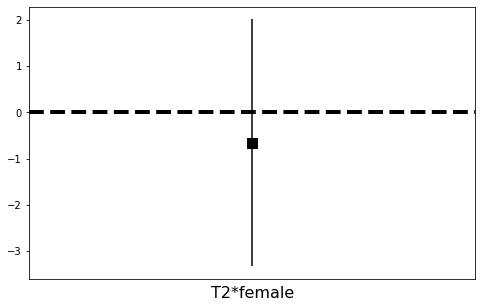

In [243]:
fig, ax = plt.subplots(figsize=(8, 5))
coef_t2female.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_t2female.shape[0]), 
           marker='s', s=120, 
           y=coef_t2female['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(['T2*female'], 
                       rotation=0, fontsize=16)

#### T2*black

In [245]:
est_ira2 = ols_ira.summary2().tables[1]['Coef.']['T2TRUE:Xblack'] 
est_ira2

0.45255699235623253

In [257]:
W2 = W.iloc[105:106]
W2

0         0
105  0.452557 -1.562534

In [253]:
coef_t2black = pd.DataFrame({'coef': W2.values[:,0],
                        'err': W2.values[:,1],
                        'varname': "T2*black"
                       })
coef_t2black

coef       err   varname
0  0.452557 -1.562534  T2*black

C:\Users\Kenia\AppData\Local\Temp/ipykernel_3376/3863381745.py:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  ax.scatter(x=pd.np.arange(coef_t2black.shape[0]),


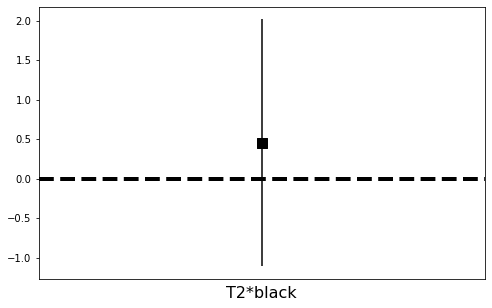

In [254]:
fig, ax = plt.subplots(figsize=(8, 5))
coef_t2black.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_t2black.shape[0]), 
           marker='s', s=120, 
           y=coef_t2black['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(['T2*black'], 
                       rotation=0, fontsize=16)

#### T2*agelt35

In [255]:
est_ira3 = ols_ira.summary2().tables[1]['Coef.']['T2TRUE:Xagelt35'] 
est_ira3

1.1233199264911773

In [259]:
W3 = W.iloc[114:115]
W3

0         0
114  1.12332 -0.891771

In [260]:
coef_t2agelt35 = pd.DataFrame({'coef': W3.values[:,0],
                        'err': W3.values[:,1],
                        'varname': "T2*agelt35"
                       })
coef_t2agelt35

coef       err     varname
0  1.12332 -0.891771  T2*agelt35

C:\Users\Kenia\AppData\Local\Temp/ipykernel_3376/2254065797.py:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  ax.scatter(x=pd.np.arange(coef_t2agelt35.shape[0]),


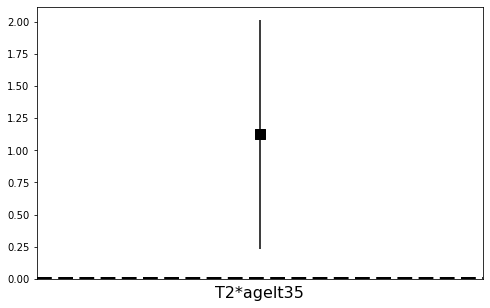

In [261]:
fig, ax = plt.subplots(figsize=(8, 5))
coef_t2agelt35.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_t2agelt35.shape[0]), 
           marker='s', s=120, 
           y=coef_t2agelt35['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(['T2*agelt35'], 
                       rotation=0, fontsize=16)

### T2*factor(dep)1


In [262]:
est_ira4 = ols_ira.summary2().tables[1]['Coef.']['T2TRUE:Xfactor(dep)1'] 
est_ira4

0.7636024530674401

In [263]:
W4 = W.iloc[107:108]
W4

0         0
107  0.763602 -1.251488

In [264]:
coef_t2factordep1 = pd.DataFrame({'coef': W4.values[:,0],
                        'err': W4.values[:,1],
                        'varname': "T2*factor(dep)1"
                       })
coef_t2factordep1

coef       err          varname
0  0.763602 -1.251488  T2*factor(dep)1

C:\Users\Kenia\AppData\Local\Temp/ipykernel_3376/1438304343.py:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  ax.scatter(x=pd.np.arange(coef_t2factordep1.shape[0]),


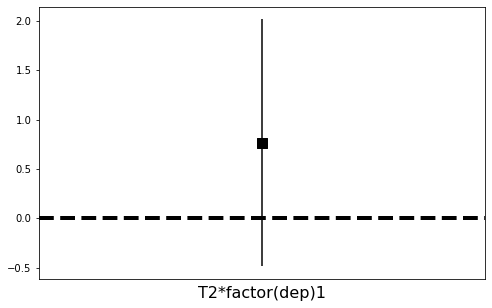

In [265]:
fig, ax = plt.subplots(figsize=(8, 5))
coef_t2factordep1.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_t2factordep1.shape[0]), 
           marker='s', s=120, 
           y=coef_t2factordep1['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(['T2*factor(dep)1'], 
                       rotation=0, fontsize=16)

In resume, it can be seen according to the graph that the estimators for the variables of female sex, brown tea, age greater than 35 and categorical by state, are ambiguous and do not provide certainty about the effects of the number of weeks unemployed, because within the 95% confidence interval is the value 0.

### D. interactive regression adjustment (IRA) using Lasso.

In [179]:
import hdmpy

In [180]:
result = pyreadr.read_r('../data/rlasso_ira_reg.RData')
X_vars = result['S']

In [181]:
log_inuidur1 = pd.DataFrame(np.log( Penn["inuidur1"] )).reset_index( drop = True )

In [182]:
X_vars

T2  X(Intercept)   XT2TRUE   Xfemale    Xblack  Xothrace  \
0    -0.419924           0.0 -0.419924 -0.400726 -0.118817 -0.005189   
1     0.580076           0.0  0.580076 -0.400726 -0.118817 -0.005189   
2    -0.419924           0.0 -0.419924 -0.400726 -0.118817 -0.005189   
3    -0.419924           0.0 -0.419924 -0.400726 -0.118817 -0.005189   
4     0.580076           0.0  0.580076  0.599274 -0.118817 -0.005189   
...        ...           ...       ...       ...       ...       ...   
5777 -0.419924           0.0 -0.419924  0.599274 -0.118817  0.994811   
5778  0.580076           0.0  0.580076 -0.400726  0.881183 -0.005189   
5779 -0.419924           0.0 -0.419924 -0.400726 -0.118817 -0.005189   
5780  0.580076           0.0  0.580076  0.599274 -0.118817 -0.005189   
5781 -0.419924           0.0 -0.419924 -0.400726 -0.118817 -0.005189   

      Xfactor(dep)1  Xfactor(dep)2       Xq2       Xq3  ...  \
0         -0.116569       0.839329 -0.200104 -0.235559  ...   
1         -0.116569      -0.160671 -0.200104  0.764441  ...   
2         -0.116569      -0.160671 -0.200104 -0.235559  ...   
3         -0.116569      -0.160671 -0.200104 -0.235559  ...   
4         -0.116569      -0.160671 -0.200104 -0.235559  ...   
...             ...            ...       ...       ...  ...   
5777      -0.116569       0.839329 -0.200104 -0.235559  ...   
5778      -0.116569      -0.160671 -0.200104 -0.235559  ...   
5779      -0.116569       0.839329  0.799896 -0.235559  ...   
5780      -0.116569      -0.160671 -0.200104 -0.235559  ...   
5781      -0.116569      -0.160671 -0.200104 -0.235559  ...   

      T2:Xagelt35:agegt54  T2:Xagelt35:durable  T2:Xagelt35:lusd  \
0                    -0.0             0.030866          0.055632   
1                     0.0            -0.042638          0.503228   
2                    -0.0             0.030866          0.055632   
3                    -0.0             0.030866          0.055632   
4                     0.0            -0.042638         -0.076849   
...                   ...                  ...               ...   
5777                 -0.0             0.030866          0.055632   
5778                  0.0            -0.042638         -0.076849   
5779                 -0.0             0.030866         -0.364292   
5780                  0.0            -0.042638         -0.076849   
5781                 -0.0             0.030866          0.055632   

      T2:Xagelt35:husd  T2:Xagegt54:durable  T2:Xagegt54:lusd  \
0             0.051201             0.007916          0.013654   
1            -0.070729            -0.010935         -0.018861   
2             0.051201             0.007916          0.013654   
3             0.051201             0.007916          0.013654   
4            -0.070729            -0.010935         -0.018861   
...                ...                  ...               ...   
5777          0.051201             0.007916          0.013654   
5778         -0.070729            -0.010935         -0.018861   
5779          0.051201             0.007916          0.013654   
5780         -0.070729            -0.010935          0.561215   
5781          0.051201            -0.412008         -0.406270   

      T2:Xagegt54:husd  T2:Xdurable:lusd  T2:Xdurable:husd  T2:Xlusd:husd  
0             0.011620          0.023095          0.012201           -0.0  
1            -0.016052         -0.031903         -0.016855            0.0  
2             0.011620          0.023095          0.012201           -0.0  
3             0.011620          0.023095          0.012201           -0.0  
4            -0.016052         -0.031903         -0.016855            0.0  
...                ...               ...               ...            ...  
5777          0.011620          0.023095          0.012201           -0.0  
5778         -0.016052         -0.031903         -0.016855            0.0  
5779          0.011620          0.023095          0.012201           -0.0  
5780         -0.016052         -

In [183]:
result = hdmpy.rlasso(X_vars.iloc[:,1:X_vars.shape[1]], X_vars['T2'])

C:\Users\Kenia\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Kenia\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\Kenia\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Kenia\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\Kenia\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Kenia\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [184]:
result.est["residuals"]

array([[4.61827832e-09],
       [4.61827698e-09],
       [4.61827832e-09],
       ...,
       [4.61827832e-09],
       [4.61827698e-09],
       [4.61827832e-09]])

In [185]:
import random 

X = np.zeros([100,1])
Y =  np.random.normal(0, 1, 100)


In [186]:
from sklearn.linear_model import LinearRegression as lm



model = lm(fit_intercept=False).fit(X, Y)

In [187]:
result = hdmpy.rlassoEffects( X_vars, log_inuidur1, index = 0 )       

rlasso_ira = pd.DataFrame(np.array( (result.res['coefficients'][0] , result.res['se'][0] , \
           result.res['t'][0] , result.res['pval'][0] ) ).reshape(1, 4) , columns = ['Coef.' , \
                            "Std.Err." , "t" , 'P>|t|'] , index = ['T2'])
rlasso_ira

Coef.      Std.Err.         t     P>|t|
T2  1.148199e+13  4.952901e+12  2.318235  0.020437

### E. Results

In [192]:
table2 = np.zeros((2, 4))
table2[0,0] = lm_cl.summary2().tables[1]['Coef.']['T2']
table2[0,1] = ols_CRA.summary2().tables[1]['Coef.']['T2']
table2[0,2] = ols_ira.summary2().tables[1]['Coef.']['T2']
table2[0,3] = rlasso_ira['Coef.']['T2']

table2[1,0] = lm_cl.summary2().tables[1]['Std.Err.']['T2']
table2[1,1] = ols_CRA.summary2().tables[1]['Std.Err.']['T2']
table2[1,2] = ols_ira.summary2().tables[1]['Std.Err.']['T2']
table2[1,3] = rlasso_ira['Std.Err.']['T2']

table2 = pd.DataFrame(table2, columns = ["CL", "CRA", "IRA", "IRA Lasso"], \
                      index = ["estimate","standard error"])

table2

CL       CRA       IRA     IRA Lasso
estimate       -0.078825 -0.069142 -0.069904  1.148199e+13
standard error  0.032509  0.032123  0.032076  4.952901e+12